# Milestone 2 - Loan Approval Machine Learning

# 1. Introduction

Name: Audrey Wanto

Batch: BSD 002

Dataset: [Loan Approval Dataset](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/)

Background: The loan approval dataset describes the financial records of individuals or organizations for obtaining loans from a lending institution. Within the real world, there are a lot of applicants that needs a loan usually to buy houses, cars, pay medical bills, and so on. These types of loans are needed because people do not have the money to pay for it all in one-go. Creating a model to predict whether an applicant will get approved or not can help save a lot of time, especially if the applicants are in a rush needing the loan. Otherwise, it can help applicants prepare the things they need in order to be approved by the loan institution.

Objective: Create a Classification Model from Machine Learning to predict whether a client will get approved or rejected for the loan based on the analysis and training done from the Loan Approval Dataset.

# 2. Import Libraries

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# For Outlier Handling
from feature_engine.outliers import Winsorizer
from scipy.stats import mstats

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder

# Evaluate Models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.compose import ColumnTransformer

# Import Classificaition Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# 3. Data Loading

In [2]:
# Load dataset
df_ori = pd.read_csv('loan_approval_dataset.csv')

# Duplicate original dataset
df_1 = df_ori.copy()

In [3]:
# Show top 10 dataset
df_1.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
# Show bottom 10 dataset
df_1.tail(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
# Checking for data information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# Show column names from df_1
df_1.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

From the info above, it can be seen that the dataset has 13 columns with 4269 non-null rows. However, the columns names seem to have white spaces, so those will be removed.

In [7]:
# Remove white spaces from column names in df_1
df_1.rename(columns=lambda x: x.strip(), inplace=True)
df_1.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
# Remove white spaces from entire column in 'loan_status'
df_1['loan_status'] = df_1['loan_status'].apply(lambda x: x.strip())

In [9]:
# Check for duplicated values in the dataset
df_1.duplicated().sum()

0

There are no duplicated rows and the column names have been changed so now the dataset can be used.

### Data Description

| Column | Description | Data Type |
| ------ | ----------- |-----------|
| loan_id | ID number of applicant | Int |
| no_of_dependents | Number of Dependents of the applicant | Int |
| education | Education of the applicant | Object |
| self_employed | Employment status of the applicant | object |
| income_annum | Annual income of the applicant | Int |
| loan_amount | Loan amount of the applicant | Int |
| loan_term | Loan term in years | Int |
| cibil_score | Credit score of the applicant | Int |
| residential_assets_value | Value of residential assets of the appplicant | Int |
| commercial_assets_value | Value of commercial assets of the applicant | Int |
| luxury_assets_value | Value of luxury assets of the applicant | Int |
| bank_asset_value | Value of bank assets of the applicant | Int |
| loan_status | Loan approval status of applicant | Object |

The data description matches with the data type from df_1.info(), so the data can be used.

# 5. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Scatterplot of `cibil_score` and `loan_amount`, differentiated by `loan_status`')

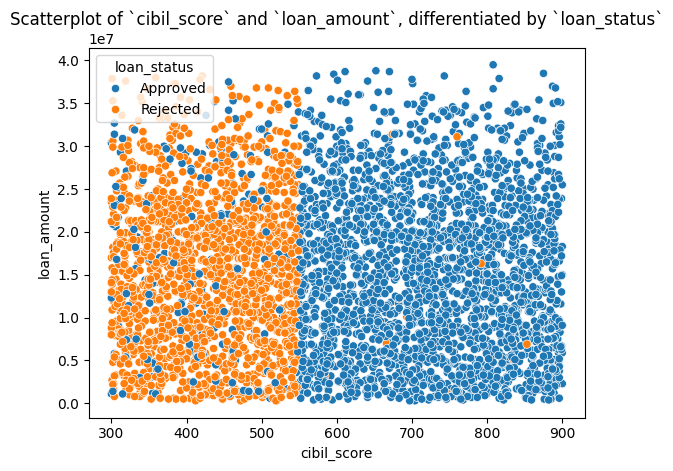

In [10]:
# Scatterplot between Limit Balance and Education Level, using marital status as hue
sns.scatterplot(data=df_1, x='cibil_score', y='loan_amount', hue='loan_status')
plt.title('Scatterplot of `cibil_score` and `loan_amount`, differentiated by `loan_status`')

From the graph above, it can be visually concluded that almost all (except 4) applicants were approved if they had a credit score above 550. While although majority of those with a credit score below 550 are rejected, it can still be seen that there are still quite a few applicants that were approved throughout. This could be affected by asset value, which can provide the loan institution collateral in case the applicant cannot pay off the loan back.

<function matplotlib.pyplot.show(close=None, block=None)>

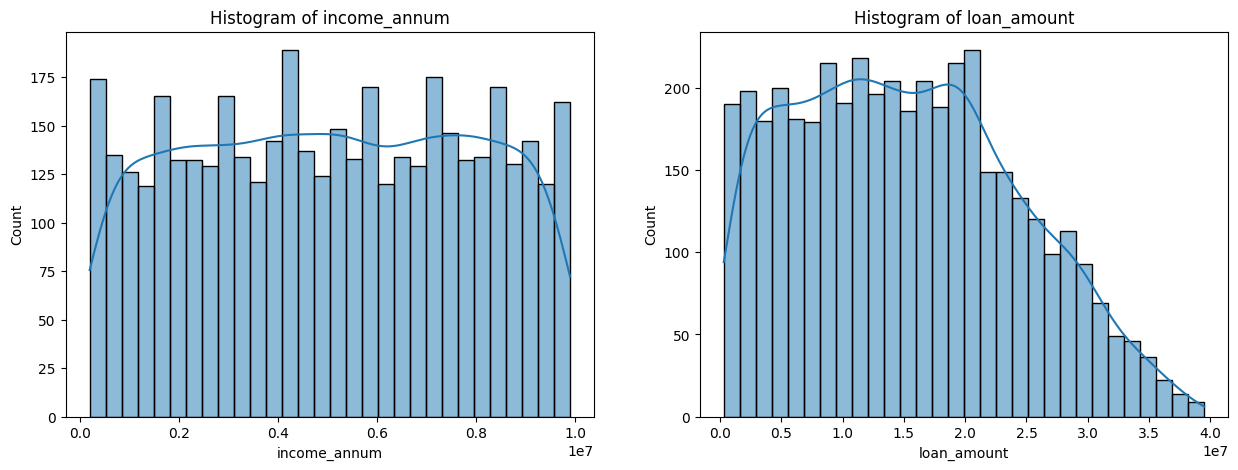

In [11]:
# Create Histograms

# Create canvas
plt.figure(figsize=(15,5))

# Plot 1 for 'price' histogram
plt.subplot(1, 2, 1)
sns.histplot(df_1['income_annum'], kde=True, bins=30)
plt.title('Histogram of income_annum')

# Plot 2 for 'distance' histogram
plt.subplot(1, 2, 2)
sns.histplot(df_1['loan_amount'], kde=True, bins=30)
plt.title('Histogram of loan_amount')

# Show all plot
plt.show

`income_annum` seems to have an even distribution, while `loan_amount` seems to have an even distribution on the left side of the graph, and drastically getting skewed going to the right side of the x-axis.

<function matplotlib.pyplot.show(close=None, block=None)>

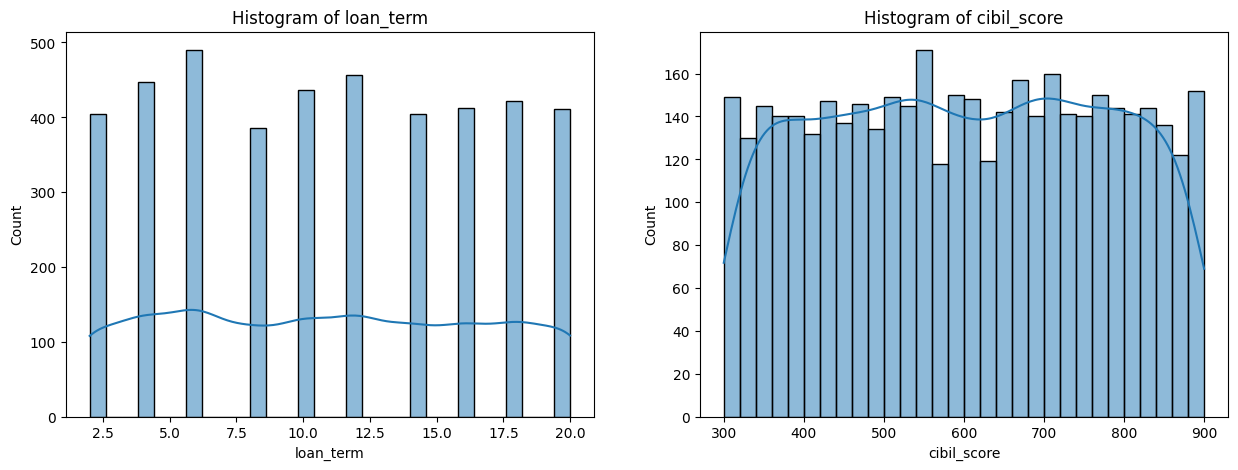

In [12]:
# Create Histograms

# Create canvas
plt.figure(figsize=(15,5))

# Plot 1 for 'price' histogram
plt.subplot(1, 2, 1)
sns.histplot(df_1['loan_term'], kde=True, bins=30)
plt.title('Histogram of loan_term')

# Plot 2 for 'distance' histogram
plt.subplot(1, 2, 2)
sns.histplot(df_1['cibil_score'], kde=True, bins=30)
plt.title('Histogram of cibil_score')

# Show all plot
plt.show

Both `loan_term` and `cibil_score` seem to have an even distribution, with counts above 350 for all loan_term, and counts above 100 for all cibil_score.

Text(0.5, 1.0, 'Pie Chart of loan_status')

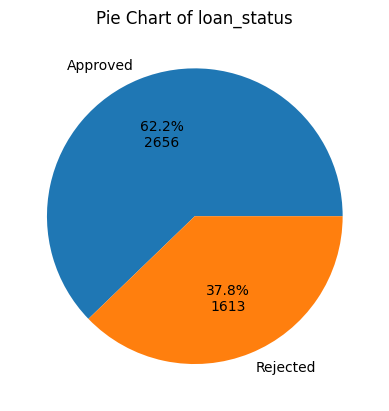

In [13]:
# Pie chart for 'loan_status'
loan_total = df_1['loan_status'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, loan_total*x/100)
plt.pie(df_1['loan_status'].value_counts().values, labels=df_1['loan_status'].value_counts().index, autopct=fmt)
plt.title('Pie Chart of loan_status')

From the pie chart is can be seen that 62.2% of the applicants were approved, while 37.8% were rejected.

Text(0.5, 1.0, 'Pie Chart of self_employed')

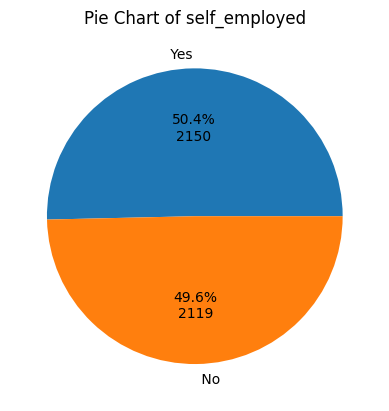

In [14]:
# Pie chart for 'self_employed'
loan_total = df_1['self_employed'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, loan_total*x/100)
plt.pie(df_1['self_employed'].value_counts().values, labels=df_1['self_employed'].value_counts().index, autopct=fmt)
plt.title('Pie Chart of self_employed')

From the `self_employed` pie chart, there is almost a 50-50 split between those that are employed and those who are not employed. It does not seem to be a big factor for the loan approval.

In [15]:
# Check columns with 'loan_status' == 'Approved' and 'cibil_score' less than 550
df_1.loc[(df_1['loan_status'] == 'Approved') & (df_1['cibil_score'] < 550)]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved
71,72,5,Graduate,Yes,5300000,18600000,4,386,2700000,9700000,11900000,4200000,Approved
95,96,5,Graduate,No,300000,1100000,2,300,100000,500000,700000,400000,Approved
152,153,1,Graduate,Yes,6500000,20600000,2,306,15900000,1900000,18100000,3200000,Approved
169,170,0,Not Graduate,Yes,4800000,17500000,2,371,11700000,6800000,18700000,3500000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,4162,5,Not Graduate,No,1100000,4000000,2,362,1800000,1300000,3500000,1100000,Approved
4217,4218,5,Not Graduate,Yes,400000,1400000,4,483,1100000,700000,800000,100000,Approved
4227,4228,4,Graduate,Yes,400000,1400000,2,496,400000,200000,1100000,400000,Approved
4238,4239,0,Not Graduate,No,2200000,7500000,2,333,3400000,600000,6200000,1500000,Approved


In [16]:
# Create a new column to add up the total asset value for each applicant
df_1['total_assets_value'] = df_1['residential_assets_value'] + df_1['commercial_assets_value'] + df_1['luxury_assets_value'] + df_1['bank_asset_value']
df_1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000


In [17]:
# Check for rows with cibil_score under 550, 'Approved', and if total asset value is higher than loan amount
df_1.loc[(df_1['loan_status'] == 'Approved') & (df_1['cibil_score'] < 550) & (df_1['total_assets_value'] > df_1['loan_amount'])]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved,25400000
71,72,5,Graduate,Yes,5300000,18600000,4,386,2700000,9700000,11900000,4200000,Approved,28500000
95,96,5,Graduate,No,300000,1100000,2,300,100000,500000,700000,400000,Approved,1700000
152,153,1,Graduate,Yes,6500000,20600000,2,306,15900000,1900000,18100000,3200000,Approved,39100000
169,170,0,Not Graduate,Yes,4800000,17500000,2,371,11700000,6800000,18700000,3500000,Approved,40700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,4162,5,Not Graduate,No,1100000,4000000,2,362,1800000,1300000,3500000,1100000,Approved,7700000
4217,4218,5,Not Graduate,Yes,400000,1400000,4,483,1100000,700000,800000,100000,Approved,2700000
4227,4228,4,Graduate,Yes,400000,1400000,2,496,400000,200000,1100000,400000,Approved,2100000
4238,4239,0,Not Graduate,No,2200000,7500000,2,333,3400000,600000,6200000,1500000,Approved,11700000


It can be seen that there is only a 1 row difference which means that total asset value does affect loan status if the applicant has it higher than the loan amount.

In [18]:
# Create new column if assets are higher than loan amount
new = []

for i, j in df_1['total_assets_value'].items():
    if j > df_1.iat[i, 5]:
        new.append('fulfilled')
    else:
        new.append('unfulfilled')

df_1['condition'] = new
df_1['condition'].value_counts()

condition
fulfilled      4240
unfulfilled      29
Name: count, dtype: int64

# 6. Data Processing (Feature Engineering)

### a) Find correlation betwewen columns

interval columns not set, guessing: ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'total_assets_value']


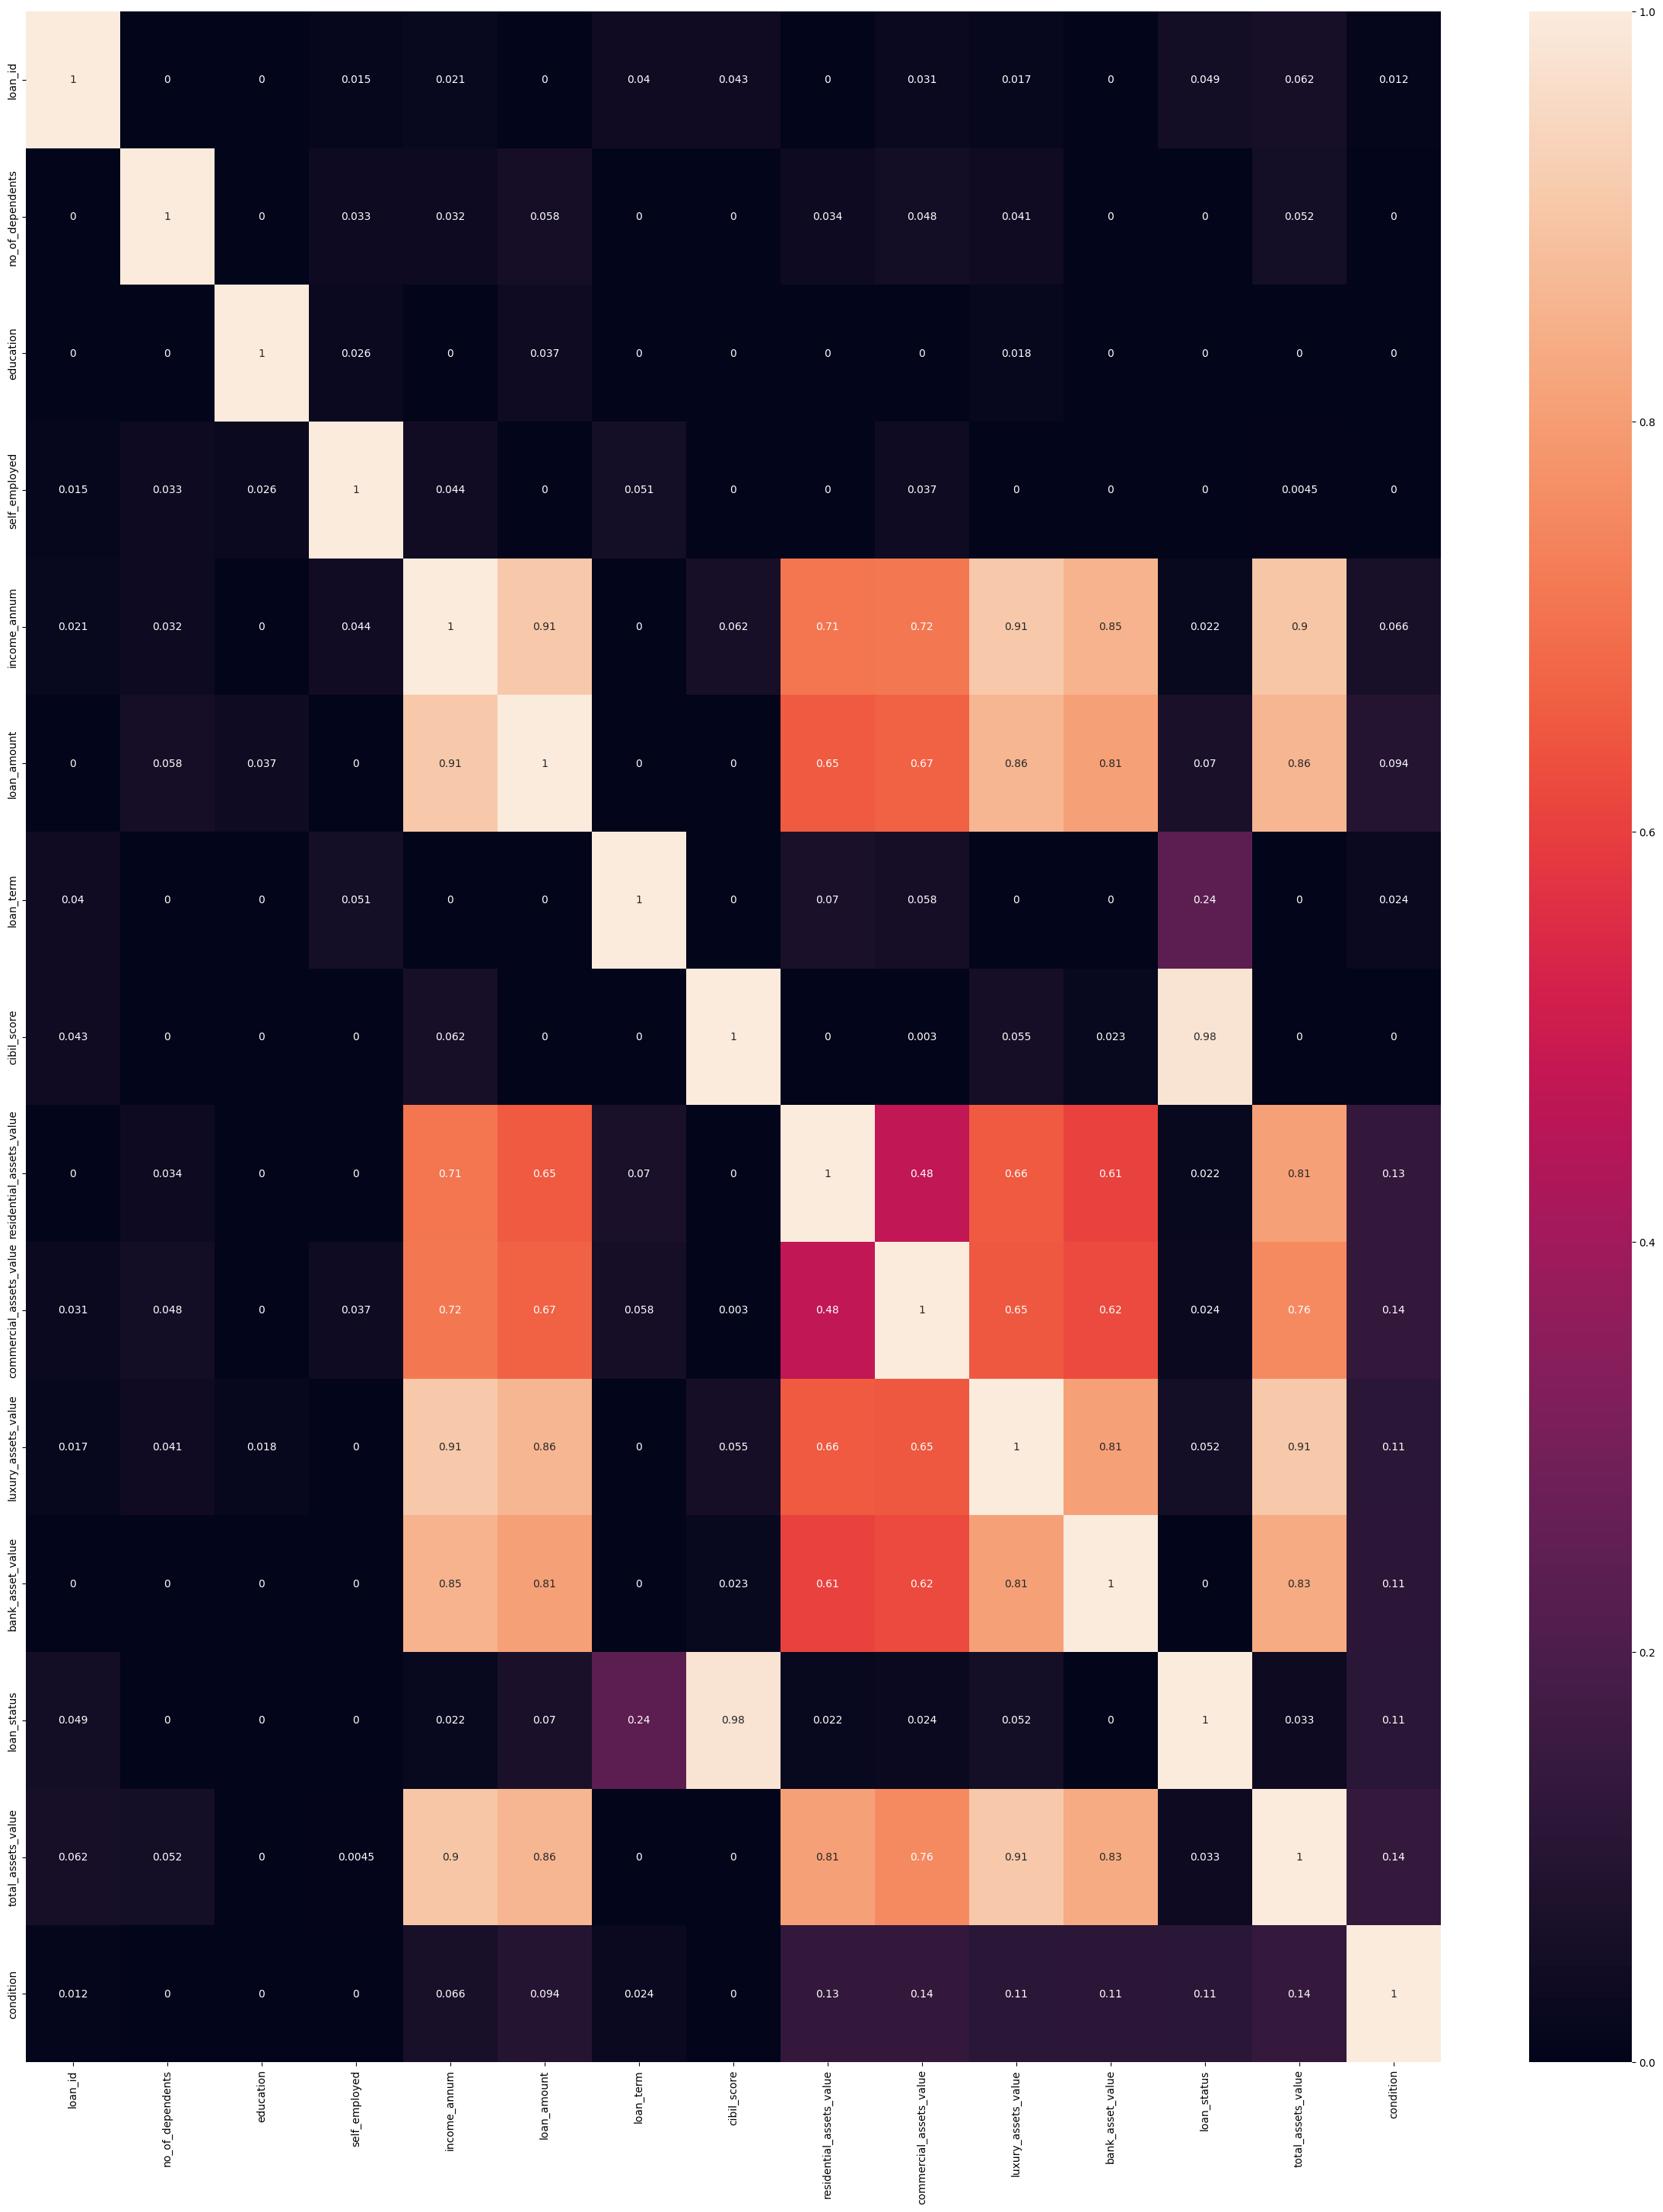

In [19]:
# Create a heatmap to show the correlation with each column
corr = df_1.phik_matrix()
plt.figure(figsize=(30,35))
sns.heatmap(corr, annot=True)
plt.show()

From the Phi K Correlation chart, the variables with correlation to `loan_status` are: 
- loan_term = 0.24
- cibil_score = 0.98
- condition = 0.11

These two columns are the only ones with a value over 0.1, so only these two columns will be used for feature selection later. However, in the EDA section, it can be seen that if 'total_assets_value' is higher than 'loan_amount, the chances of the loan being is approved is extremely high.

### b) Split between X and y

In [20]:
#Split between 'X' and 'y'

X = df_1.drop(['loan_status'], axis=1)
y = df_1.loan_status
X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value,condition
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,50700000,fulfilled
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,17000000,fulfilled
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,57700000,fulfilled
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,52700000,fulfilled
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,55000000,fulfilled


### c) Split between Train set and Test set

In [21]:
# Splitting between Train and Test using .train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
X_train.head()

Train Size:  (3415, 14)
Test Size:  (854, 14)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value,condition
1534,1535,1,Not Graduate,No,2600000,7900000,12,306,2000000,2400000,7600000,3300000,15300000,fulfilled
1316,1317,0,Graduate,Yes,6100000,19900000,20,761,4500000,3700000,12700000,7100000,28000000,fulfilled
934,935,3,Graduate,Yes,7900000,29200000,4,399,23200000,5500000,30200000,6900000,65800000,fulfilled
1143,1144,1,Graduate,Yes,200000,400000,8,569,200000,200000,700000,300000,1400000,fulfilled
3398,3399,2,Graduate,Yes,6900000,25300000,4,763,9000000,3600000,21300000,5500000,39400000,fulfilled


There will be 3415 rows taken for Training, and 854 rows for Testing. The amount of test size is 20% of the original dataset.

### d) Cardinality

In [22]:
# Count the number of unique values in each column
print('Number of categories in the variable loan_term                : {}'.format(len(X_train.loan_term.unique())))
print('Number of categories in the variable cibil_score              : {}'.format(len(X_train.cibil_score.unique())))
print('Number of categories in the variable condition                : {}'.format(len(X_train.condition.unique())))

Number of categories in the variable loan_term                : 10
Number of categories in the variable cibil_score              : 601
Number of categories in the variable condition                : 2


As all the columns being checked are of numerical data, there is no need to handle cardinality.

### e) Dropping Columns

In [23]:
# Drop Columns in X_test
X_test = X_test.drop(['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum',
                      'loan_amount', 'residential_assets_value', 'commercial_assets_value', 
                      'luxury_assets_value', 'bank_asset_value', 'total_assets_value'], axis=1)

In [24]:
# Drop Columns in X_train
X_train = X_train.drop(['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum',
                      'loan_amount', 'residential_assets_value', 'commercial_assets_value', 
                      'luxury_assets_value', 'bank_asset_value', 'total_assets_value'], axis=1)

In [25]:
# Check the shape of X-test
X_train.shape

(3415, 3)

In [26]:
# Check the head of X_train
X_train.head()

,loan_term,cibil_score,condition
1534,12,306,fulfilled
1316,20,761,fulfilled
934,4,399,fulfilled
1143,8,569,fulfilled
3398,4,763,fulfilled


After dropping the columns, there are only 3 columns remaining for model traiing and testing.

### f) Handling Outlier

In [27]:
# Create loop within the data
for i in X_train.columns:
        if i == 'condition':
                pass
        else:
                print('Skewness of column `',i,'`:', df_1[i].skew())
                print('Kurtosis of column `',i,'`:', df_1[i].kurtosis())
                print('')

Skewness of column ` loan_term `: 0.036358907356478495
Kurtosis of column ` loan_term `: -1.2208527369898254

Skewness of column ` cibil_score `: -0.009039277330065707
Kurtosis of column ` cibil_score `: -1.1856695832238278



As `condition` is categorical, the outlier will not be handled.

`loan_term` and `cibil_score` both have a normal distribution, and a kurtosis value below 2, which means they are both Mesokurtic.

In [28]:
# Function to create histogram and boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

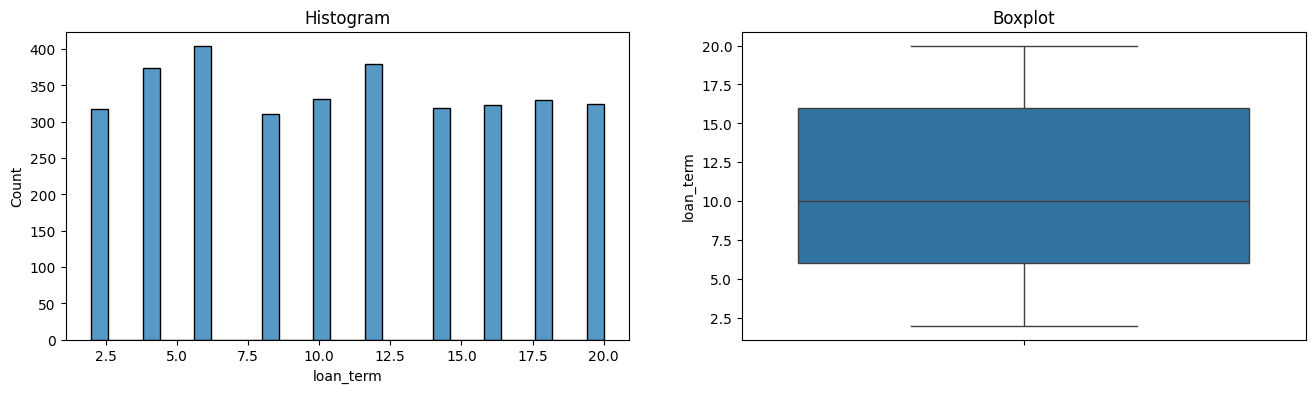

In [29]:
# Check visualization for 'loan_term' distribution
diagnostic_plots(X_train, 'loan_term')

There are no outliers visible within the graph, with an even distribution all throughout.

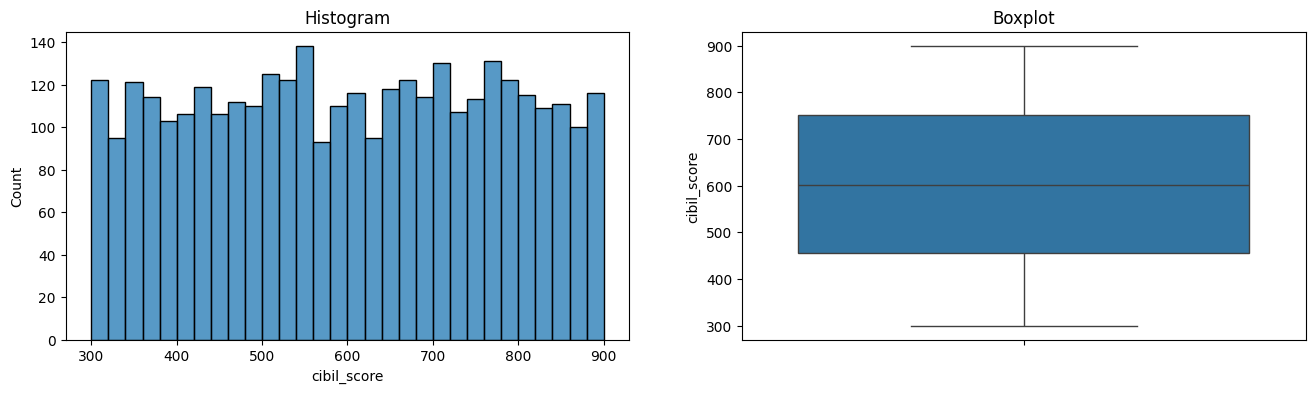

In [30]:
# Check visualization for 'cibil_score' distribution
diagnostic_plots(X_train, 'cibil_score')

Similar to `loan_term`, there are no outliers visible in the graph, and the data is evenly distributed.

**Censoring** or **Capping** will be used to handle 

In [31]:
# Capping the data using Winsorizer
winsoriser_fare = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=1.5,
                             variables=['loan_term', 'cibil_score'])

X_train_capped = winsoriser_fare.fit_transform(X_train)

In [32]:
# Output the new values of skeweness and kurtosis for 'loan_term'
print('The new Skewness of `loan_term` is: ', X_train_capped['loan_term'].skew())
print('The new Kurtosis of `loan_term` is: ', X_train_capped['loan_term'].kurtosis())

The new Skewness of `loan_term` is:  0.033664885662915894
The new Kurtosis of `loan_term` is:  -1.2864869918456179


In [33]:
# Output the new values of skeweness and kurtosis for 'cibil_score'
print('The new Skewness of `cibil_score` is: ', X_train_capped['cibil_score'].skew())
print('The new Kurtosis of `cibil_score` is: ', X_train_capped['cibil_score'].kurtosis())

The new Skewness of `cibil_score` is:  -0.013798019919933839
The new Kurtosis of `cibil_score` is:  -1.2771518249366334


After censoring, it can be seen the skewness have decreased, even if not by much. This is because the data is already normally distributed.

### g) Missing Value Handling

In [34]:
# Check Missing Value in X_train
X_train_capped.isnull().sum().sum()

0

In [35]:
# Check Missing Value in X_test
X_test.isnull().sum().sum()

0

In [36]:
# Check Missing Value in y_train
y_train.isnull().sum().sum()

0

In [37]:
# Check Missing Value in y_test
y_test.isnull().sum().sum()

0

As there are no missing values within the entire dataset, there is no need to handle missing values.

### h) Feature Selection

#### Split between Numerical and Categorical column

In [38]:
# Split the columns into num_col and cat_col
num_col = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_col = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical column:', num_col)
print('Categorical column:', cat_col)

Numerical column: ['loan_term', 'cibil_score']
Categorical column: ['condition']


In [39]:
# Split train set and test test based on column types
X_train_num = X_train_capped[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train_capped[cat_col]
X_test_cat = X_test[cat_col]

# Turn the X_train_num into a dataframe
X_train_num_df = pd.DataFrame(X_train_num)
X_test_num_df = pd.DataFrame(X_test_num)

X_train_num.shape

(3415, 2)

#### Feature Scaling

In [40]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

StandardScaler() is used as the numerical data within the dataset are normally distributed.

#### Feature Encoding

In [41]:
# Feature encoding for data
oheEncoder = OneHotEncoder()

X_train_encoded = oheEncoder.fit_transform(X_train_cat)
X_test_encoded = oheEncoder.transform(X_test_cat)

X_train_cat_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=oheEncoder .get_feature_names_out(X_train_cat.columns))
X_test_cat_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=oheEncoder .get_feature_names_out(X_test_cat.columns))

X_train_cat_encoded

,condition_fulfilled,condition_unfulfilled
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3410,1.0,0.0
3411,1.0,0.0
3412,1.0,0.0
3413,1.0,0.0


OneHotEncoder() is used as the categorical column is nominal, or binary (yes/no)

In [42]:
# Encode the target into binary data
y_train_encoded = y_train.replace({'Rejected': 0, 'Approved': 1})
y_test_encoded = y_test.replace({'Rejected': 0, 'Approved': 1})

#### Concatenante between numerical and categorical columns

In [43]:
# Concat Column
X_train_final = np.concatenate([X_train_cat_encoded, X_train_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encoded, X_test_scaled], axis=1)

# Extract name from encoded features
encoded_cols = oheEncoder.get_feature_names_out()

# Make it into a dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=list(encoded_cols) + num_col)
X_test_final_df = pd.DataFrame(X_test_final, columns=list(encoded_cols) + num_col)

In [44]:
# Check the top 5 data in X_train_final_df
X_train_final_df.head()

,condition_fulfilled,condition_unfulfilled,loan_term,cibil_score
0,1.0,0.0,0.215868,-1.542966
1,1.0,0.0,1.541478,0.954346
2,1.0,0.0,-1.220394,-1.205636
3,1.0,0.0,-0.502263,-0.191280
4,1.0,0.0,-1.220394,0.966279


#### Column Transformer Pipeline

In [45]:
# Create column transformer

preprocessor = ColumnTransformer(
    transformers = [
        ('num_col', scaler, num_col),
        ('cat_col', oheEncoder, cat_col)
    ]
)

# 7. Model Definition

In [46]:
# Check value counts of target to evaluate which type of matrix will be used, and checking data imbalance
y_train_encoded.value_counts()

loan_status
1    2131
0    1284
Name: count, dtype: int64

Because the data is imbalanced, f1 score will be used as the target is of binary classification. Oversampling will also be used to even out the distribution to counter data imbalance.

In [47]:
# Define oversampling Strat
oversample = RandomOverSampler(sampling_strategy='minority')

In [48]:
# Oversampling the final X_train and y_train
X_train_sample, y_train_sample = oversample.fit_resample(X_train_final_df, y_train_encoded)

In [49]:
# Output the shape of the previous data and the new data
print('Old X_train size                         :', X_train_final_df.shape)
print('New X_train size after oversampling      :', X_train_sample.shape)
print('')
print('Old y_train size                         :', y_train_encoded.shape)
print('New y_train size after oversampling      :', y_train_sample.shape)

Old X_train size                         : (3415, 4)
New X_train size after oversampling      : (4262, 4)

Old y_train size                         : (3415,)
New y_train size after oversampling      : (4262,)


In [50]:
# New y_train value count
y_train_sample.value_counts()

loan_status
0    2131
1    2131
Name: count, dtype: int64

After Oversampling, it can be seen that the total amount for rejected (0) and approved (1) is equal.

In [51]:
# Model definition
log_model = LogisticRegression(max_iter=1000000)
svm_model = SVC()
dt_model = DecisionTreeClassifier(random_state=10)
rf_model = RandomForestClassifier(random_state=10)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
ada_model = AdaBoostClassifier()

In [52]:
# Define skfold
skfold = StratifiedKFold(n_splits=5)

In [53]:
# Define Cross Validation (score) for each model
cv_log_model = cross_val_score(log_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')
cv_svm_model = cross_val_score(svm_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')
cv_dt_model = cross_val_score(dt_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')
cv_rf_model = cross_val_score(rf_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')
cv_knn_model = cross_val_score(knn_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')
cv_nb_model = cross_val_score(nb_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')
cv_ada_model = cross_val_score(ada_model, X_train_sample, y_train_sample, cv=skfold, scoring='f1')

# 8. Model Training

In [54]:
# Finding best model based on Cross_Val_score (mean)
name_model = []
cv_scores = 0
for cv, name in zip([cv_log_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_knn_model, cv_nb_model, cv_ada_model],
                    ['log_model', 'svm_model', 'dt_model', 'rf_model', 'knn_model', 'nb_model', 'ada_model']):
  print(name)
  print('f1score - All - Cross Validation: ', cv)
  print('f1score - Mean - Cross Validation: ', cv.mean())
  print('f1score - Std - Cross Validation: ', cv.std())
  print('f1score - Range of Test Set: ', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model: ', name_model)
print('Cross Val Mean from Best Model: ', cv_scores)

log_model
f1score - All - Cross Validation:  [0.94131737 0.92397661 0.91597633 0.92694611 0.91646778]
f1score - Mean - Cross Validation:  0.9249368386063136
f1score - Std - Cross Validation:  0.009222759840146182
f1score - Range of Test Set:  0.9157140787661674 - 0.9341595984464598
--------------------------------------------------
svm_model
f1score - All - Cross Validation:  [0.95377129 0.94316808 0.93658537 0.94621027 0.94762485]
f1score - Mean - Cross Validation:  0.9454719698949653
f1score - Std - Cross Validation:  0.005627403080273866
f1score - Range of Test Set:  0.9398445668146914 - 0.9510993729752392
--------------------------------------------------
dt_model
f1score - All - Cross Validation:  [0.96642686 0.95560748 0.96305125 0.97624703 0.9740566 ]
f1score - Mean - Cross Validation:  0.9670778442582033
f1score - Std - Cross Validation:  0.007496447596292655
f1score - Range of Test Set:  0.9595813966619107 - 0.974574291854496
--------------------------------------------------


The results above shows that the best model to use will be Decision Tree. There will be hyperparameter tuning for random search using DecisionTreeClassifier().

In [55]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
# n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'criterion': ['gini', 'entropy'],
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}

# Random Search
randomcv = RandomizedSearchCV(dt_model,
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 n_jobs=-1,
                                 scoring='f1')
randomcv.fit(X_train_sample, y_train_sample)

# Results
print('Best cross-validation accuracy : {:.2f}'.format(randomcv.best_score_))
print('Best parameters : ', randomcv.best_params_)
print('Test set accuracy : {:.2f}'.format(randomcv.score(X_test_final_df, y_test_encoded)))

Best cross-validation accuracy : 0.97
Best parameters :  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 780, 'criterion': 'entropy'}
Test set accuracy : 0.96


The parameters that will be used can be summarized as:
- min_samples_split: 2
- min_samples_leaf: 1
- max_depth: 780
- criterion: 'entropy'

In [56]:
# Create variable with the best parameters for the model
dt_randomcv_best = randomcv.best_estimator_

# 9. Model Evaluation

F1 Score - Train Set  :  0.9871733966745844 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2131
           1       1.00      0.98      0.99      2131

    accuracy                           0.99      4262
   macro avg       0.99      0.99      0.99      4262
weighted avg       0.99      0.99      0.99      4262
 

Confusion Matrix      : 


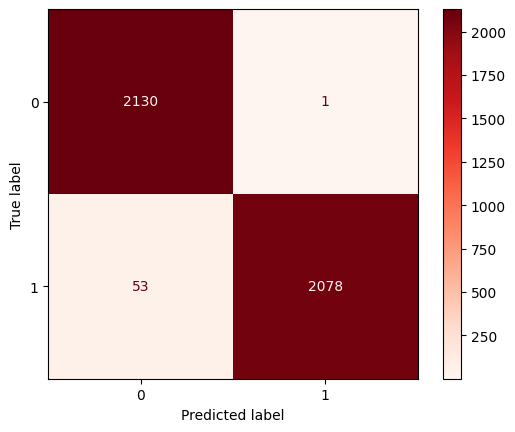

In [57]:
# Check Performance Model against Train-Set

y_pred_train_sample = dt_randomcv_best.predict(X_train_sample)

print('F1 Score - Train Set  : ', f1_score(y_train_sample, y_pred_train_sample), '\n')
print('Classification Report : \n', classification_report(y_train_sample, y_pred_train_sample), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_train_sample, y_train_sample, cmap='Reds'))

The results above show an extremely good score for precision, recall, f1, and accuracy. All values are either 98% or 99%. This could either mean the model trained was really good, or coincidentally good at guessing.

There are 2130 values included in True Negative, 1 values included in False Positive, 53 values in False Negative, and 2078 values in True Positive.

F1 Score - Test Set   :  0.963531669865643 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       329
           1       0.97      0.96      0.96       525

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.96      0.96       854
 

Confusion Matrix      : 


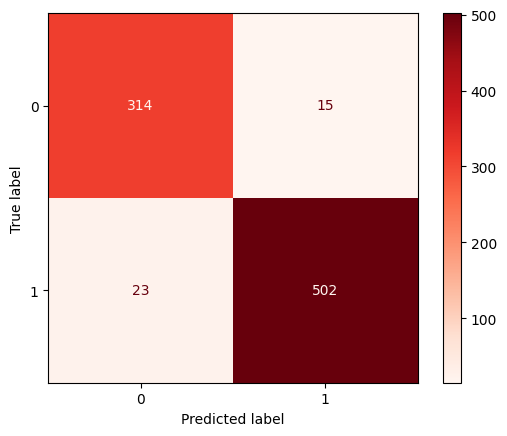

In [58]:
# Check Performance Model against Test-Set

y_pred_test_sample = dt_randomcv_best.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test_encoded, y_pred_test_sample), '\n')
print('Classification Report : \n', classification_report(y_test_encoded, y_pred_test_sample), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_test_final_df, y_test_encoded, cmap='Reds'))

For the test-set, while the values are not 98% or 99% for the Cross Val scores, they are still above 90% (all within the range of 93% to 97%), which is still really good. This means there are about less than 7% or less in error with predicting the right values.

In [59]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train_sample, y_pred_train_sample, y_test_encoded, y_pred_test_sample, name):
  score_reports = {
      'train - precision' : precision_score(y_train_sample, y_pred_train_sample),
      'train - recall' : recall_score(y_train_sample, y_pred_train_sample),
      'train - accuracy' : accuracy_score(y_train_sample, y_pred_train_sample),
      'train - f1_score' : f1_score(y_train_sample, y_pred_train_sample),
      'test - precision' : precision_score(y_test_encoded, y_pred_test_sample),
      'test - recall' : recall_score(y_test_encoded, y_pred_test_sample),
      'test - accuracy_score' : accuracy_score(y_test_encoded, y_pred_test_sample),
      'test - f1_score' : f1_score(y_test_encoded, y_pred_test_sample),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train_sample, y_pred_train_sample, y_test_encoded, y_pred_test_sample, 'Random Search')
pd.DataFrame(all_reports)

,Random Search
test - accuracy_score,0.955504
test - f1_score,0.963532
test - precision,0.970986
test - recall,0.956190
train - accuracy,0.987330
train - f1_score,0.987173
train - precision,0.999519
train - recall,0.975129


The train-set has an overall better random search score (97-99%) compared to that of test-set (95-97%). There is a very insignificant difference, and since both values are above 90%, this model is considered slightly over fit.

In [60]:
# Create a table to show the y_test and y_pred_test
results = pd.DataFrame()
results['y_test'] = y_test_encoded
results['y_pred_test'] = y_pred_test_sample
results

,y_test,y_pred_test
1654,1,1
924,0,0
42,0,0
2497,1,1
1763,1,1
...,...,...
1370,0,0
1085,1,1
3415,1,1
3730,1,0


In [61]:
# Check the value counts in y_test
results['y_test'].value_counts()

y_test
1    525
0    329
Name: count, dtype: int64

In [62]:
# Check the value counts in y_pred_test_sample
results['y_pred_test'].value_counts()

y_pred_test
1    517
0    337
Name: count, dtype: int64

From the code above, it can be seen that the only mistake the model made was 6 data off from the actual result. Only 8 out of 854 data means there was only a 0.009% error from the model.

# 10. Model Saving for Inference Dataset

#### Pipeline

In [63]:
# Create a pipeline for use in model inference and model saving
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", dt_randomcv_best)]
)

In [64]:
# Fit the pipeline to X_train and y_train
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_col', StandardScaler(),
                                                  ['loan_term', 'cibil_score']),
                                                 ('cat_col', OneHotEncoder(),
                                                  ['condition'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=780,
                                        random_state=10))])

In [65]:
# Saving the files
with open('clf.pkl', 'wb') as file_1:
    pickle.dump(clf, file_1)

In [66]:
# List the columns
df_1.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'total_assets_value', 'condition'],
      dtype='object')

# 11. Model Inference

> This section will be done in a different notebook titled `P1M2_Audrey_Wanto_inf.ipynb`

# 12. Conclusion

- There is a total of 3 columns used for features (X Variables) out of the 15 total columns (including new columns created)
- The outliers were handled using Capping/Censoring (Winsorizer method), but the numerical data used for features were already normally distributed.
- There were no missing values within the dataset
- StandardScaler() was used for feature scaling as the numerical data are normally distributed
- OneHotEncoder() was used for feature encoding because the categorical data was nominal/binary (can be encoded into 1 and 0)
- The target (y) was encoded manually into 1 and 0 as OneHotEncoder is used for a 2D array, and y is of a 1D array
- Through model definition, the best model with the highest cross val mean is DecisionTreeClassifier()
- The cross-validation accuracy was 0.97, and the Test-set accuracy was 0.96
- The parameters used after hyperparameter tuning are: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 780, 'criterion': 'entropy'}
- The f1 score for Test-set resulted in 0.955504, while the f1 score for Train-set resulted in 0.987330
- The model is slightly over fit because both Train-set and Test-set had Cross-Validation score of above 90%, and the Train Set value is higher than the Test Set
- This could be resulted from the lack of features (X variables), that could affect the model prediction. Another factor could be using RandomOverSampler for Oversampling, which is reusing the data to make up for the data imbalance (prone to overfitting)
- From the prediction, as long as the value of total assets is above the loan amount, it will be approved. However this is not always the case with the whole dataset, as credit score also affects the loan status. Having a high credit score will usually be accepted by loan institutions (as they are a metric of how well people pay their bills on time), yet this was not the case with the model
- This could have been impacted by the use of DecisionTreeClassifier as it is prone to overfitting, and the feature selection was not accurate enough

# 13. Conceptual Problems


**Jelaskan latar belakang adanya bagging dan cara kerja bagging !**

Bagging is a technique derived from ensemble learning to improve the model/algorithm through accuracy and performance/ It helps reduces the variance of the model, which is used to combat biasness within variance. It can avoid overfitting which is important in the use of machine learning models. Bagging works through choosing features randomly for sample observation, then the best subset of features will be chosen to split the features, where the step is repeated multiple times to help the decision tree give the best prediction.

**Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !**

Random Forest algorithm works through the generalized data, which takes individual instances and selects the majority party from the closest set of data. Random Forest is also made up of decision tree algorithm, which is more prone to overfitting. AdaBoost is the algorithm chosen because it uses a variety of classification algorithm that can classify data through the combination of weak learners, such as the decision tree, and makes it into a strong learner. It helps with the performance of decision tree classifcation problems.

**Jelaskan apa yang dimaksud dengan Cross Validation !**

Cross Validation is used in machine learning for evaluating the performance of a model. The data is separated into multiple datasets, which will then be used for training and testing the model multiple times, until optimal and reliable evaluation metrics are achieved.

